# Local thickness on an image and a volume

**2D and 3D local thickness using `localthickness` module. Requires downloading data.** 

Authors: vand@dtu.dk, abda@dtu.dk

Demos showing the use of the algorithm from `localthickness` module. For an object in 2D or 3D, the local thickness in any point of the object is defined as the radius of the larges sphere which fits inside the object and contains the point. Function for the computation of local thickness takes a binary 2D or 3D image as input, where ones represent the object to be measured. The function returns an array of the same size as the input which in every pixel (voxel) carries information about the local thickness of the object. Function call is
```
T = local_thickness(B, scale=1, mask=None)
```
Here, `B` is a binary image, `scale` is downscaling factor (smaller than 1), and `mask` is an optional binary mask of the same size as the image defining parts of the image to be included in the computation of the local thicknes.


In [ ]:
# Install localthickness (if not installed) and get data (if needed).
!pip install edt
!pip install localthickness

import os
if not os.path.isdir('data'):
    os.mkdir('data')
if not os.path.isfile('data/test_2D_A.png'):
    !wget -q https://github.com/vedranaa/local-thickness/blob/main/data/test_2D_A.png?raw=true --output-document=data/test_2D_A.png
if not os.path.isfile('data/cotton_test_volume.tif'):
    print('aha')
    !wget -q https://github.com/vedranaa/local-thickness/blob/main/data/cotton_test_volume.tif?raw=true --output-document=data/cotton_test_volume.tif


## Local thickness in 2D
The 2D example loads a synthetic test image and computes local thickness.

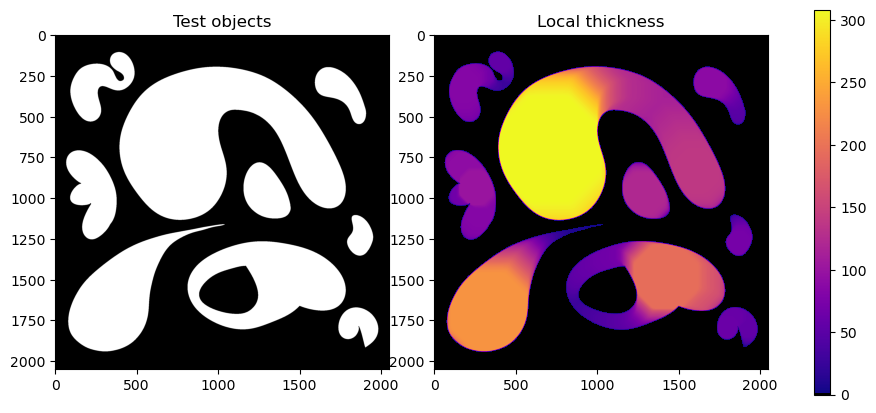

In [2]:
import skimage.io
import matplotlib.pyplot as plt
import localthickness as lt

# Load image with test objects to be analysed and make it binary.
B = skimage.io.imread('data/test_2D_A.png', as_gray = True) > 0.5 

# Compute local thickness using scaled approach.
T = lt.local_thickness(B, scale=0.25)

# Visualize.
%matplotlib inline
fig, ax = plt.subplots(1, 3, figsize=(10,5), gridspec_kw={"width_ratios":[1, 1, 0.05]})
ax[0].imshow(B, cmap=plt.cm.gray)
ax[0].set_title('Test objects')
h = ax[1].imshow(T, cmap=lt.black_plasma())
ax[1].set_title('Local thickness')
fig.colorbar(h, cax=ax[2])
plt.show()

## Fast local thickness in 3D
We compute local thickness and show it on a few slices from the volume. 

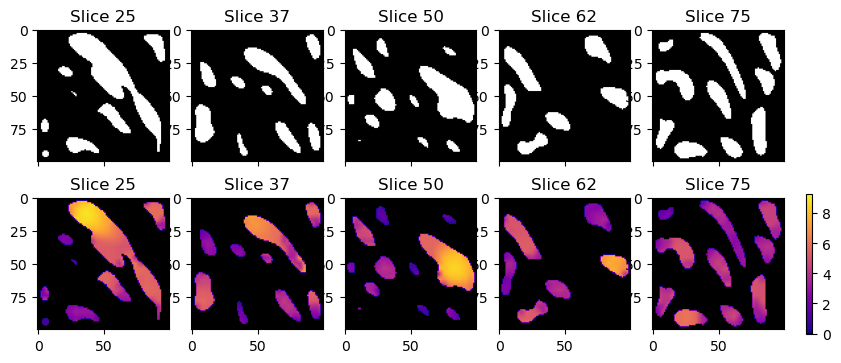

In [3]:
import matplotlib.pyplot as plt
import localthickness as lt
import tifffile

# Load volume with test objects to be analysed and make it binary.
B = tifffile.imread('data/cotton_test_volume.tif') > 0

# Compute local thickness using scaled approach.
T = lt.local_thickness(B, scale=0.25)

# Visualize slices of the result.
%matplotlib inline
fig, ax = plt.subplots(2, 6, figsize=(10,4), sharex='col', sharey='col', 
                       gridspec_kw={"width_ratios":[1, 1, 1, 1, 1, 0.05]})
vmax = T.max()
for i in range(5):
    z = ((i+2)*(B.shape[0]))//8
    h0 = ax[0][i].imshow(B[z], cmap=plt.cm.gray)
    ax[0][i].set_title(f'Slice {z}')
    h1 = ax[1][i].imshow(T[z], vmax=vmax, cmap=lt.black_plasma())
    ax[1][i].set_title(f'Slice {z}')
fig.colorbar(h1, cax=ax[1][5]) 
ax[0][5].remove()
plt.show()